In [113]:
from qiskit.quantum_info import random_density_matrix, Operator, Statevector, DensityMatrix, random_unitary, random_statevector, random_clifford, Pauli, SparsePauliOp
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import RXGate, RYGate, RZGate
from qiskit.visualization import *

import numpy as np
import pandas as pd
import scipy as sp
from math import pi, cos, sin, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import product

In [114]:
def hwp(theta):
     return Operator([[-cos(2 * theta), -sin(2 * theta)],
                       [-sin(2 * theta), cos(2 * theta)]])

In [115]:
def qwp(theta):
     return Operator([[1 - (1 + 1j) * (cos(theta)) ** 2, -(1 + 1j) * sin(theta) * cos(theta)],
                      [-(1 + 1j) * sin(theta) * cos(theta), 1 - (1 + 1j) * (sin(theta)) ** 2]])

In [116]:
import numpy as np
from scipy.optimize import minimize

# Define a global variable for U
T_gate = random_unitary(2, seed=10).to_matrix()
U = None  # Initialize U

# Define the objective function to maximize
def objective_function(theta_values):
    global U  # Use the global U variable
    theta_hwp1, theta_qwp, theta_hwp2 = theta_values

    # Define the H and D states as needed
    H_state = np.array([1, 0])
    D_state = np.array([1/sqrt(2), 1/sqrt(2)])

    # Calculate the U gate
    U = RZGate(theta_hwp1).to_matrix() @ RXGate(theta_qwp).to_matrix() @ RZGate(theta_hwp2).to_matrix()

    # Calculate the probabilities
    T_H = T_gate @ H_state
    T_D = T_gate @ D_state
    U_T_H = U @ T_H
    U_T_D = U @ T_D

    prob_H_H = np.abs(np.vdot(H_state, U_T_H)) ** 2
    prob_D_D = np.abs(np.vdot(D_state, U_T_D)) ** 2

    # Calculate the product of probabilities to maximize
    return -(prob_H_H * prob_D_D)

# Define a custom callback function to print intermediate results
def callback(xk):
    print(f"Optimization Step: {len(callback.steps)}")
    print(f"Theta Values: {xk}")
    theta_hwp1, theta_qwp, theta_hwp2 = xk
    max_prob = -objective_function(xk)
    print(f"Maximum Probability: {max_prob}\n")
    callback.steps.append(max_prob)

callback.steps = []

# Initial guess for theta values
initial_theta_values = [0.0, 0.0, 0.0]

# Perform the optimization with the custom callback
result = minimize(objective_function, initial_theta_values, method='Powell', options={'disp': True, 'maxiter': 10}, callback=callback)

# Extract the optimal theta values and the maximum probability
optimal_theta_values = result.x
max_probability = -result.fun

# Print the final optimal theta values and maximum probability
print("\nOptimal Theta Values:", optimal_theta_values)
print("Maximum Probability:", max_probability)

# Print the final states
print("\nT @ H:", T_gate @ np.array([1, 0]))
print("T @ D:", T_gate @ np.array([0, 1]))
print("U @ T @ H:", U @ (T_gate @ np.array([1, 0])))
print("U @ T @ D:", U @ (T_gate @ np.array([0, 1])))


Optimization Step: 0
Theta Values: [ 2.618034   -1.17875457 -0.41776158]
Maximum Probability: 0.758268742180541

Optimization Step: 1
Theta Values: [ 3.53825252 -1.61956297 -0.52028376]
Maximum Probability: 0.998725261508985

Optimization Step: 2
Theta Values: [ 3.60124925 -1.58925367 -0.52568731]
Maximum Probability: 0.9999988682074531

Optimization Step: 3
Theta Values: [ 3.60098659 -1.58739545 -0.52609682]
Maximum Probability: 0.9999999940175899

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 4
         Function evaluations: 125

Optimal Theta Values: [ 3.60098659 -1.58739545 -0.52609682]
Maximum Probability: 0.9999999940175899

T @ H: [-0.68411829-0.15413097j -0.48475359+0.52272341j]
T @ D: [-0.16792594-0.69283959j  0.67231568+0.19941368j]
U @ T @ H: [-2.52213137e-01+9.67671705e-01j  6.60513042e-05+3.58320815e-05j]
U @ T @ D: [ 7.51383781e-05+9.67982318e-07j -2.52219607e-01+9.67670018e-01j]


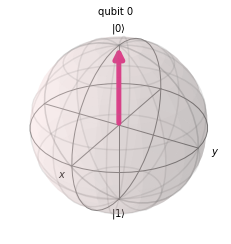

In [117]:
plot_bloch_multivector(U @ (T_gate @ np.array([1, 0])))

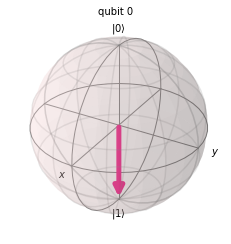

In [118]:
plot_bloch_multivector(U @ (T_gate @ np.array([0, 1])))

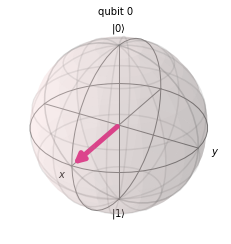

In [119]:
psi_test = Statevector.from_label("+").data
plot_bloch_multivector(psi_test)

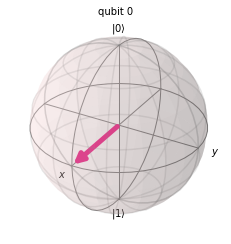

In [120]:
plot_bloch_multivector(U @ T_gate @ psi_test)

In [121]:
from qiskit.quantum_info import process_fidelity

In [122]:
T_gate @ U

array([[-2.52200750e-01+9.67674933e-01j, -6.97295968e-05+2.31314232e-05j],
       [-4.95671424e-05-5.42252506e-05j, -2.52231993e-01+9.67666790e-01j]])

In [123]:
process_fidelity(Operator(T_gate @ U), Operator(np.eye(2)))

0.9999999943421103